In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import scipy.signal as sig
import matplotlib.pyplot as plt
import math
%matplotlib inline
import sys
sys.path.append('../../helpers/')
from plot_3D import plot_3D
from unsharp import unsharp


## Definición de los coeficientes

In [2]:
#h = [[0, 1/6, 0],[1/6,1/3,1/6],[0,1/6,0]]
h = unsharp()
print(h)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


## Respuesta en frecuencia del filtro

In [3]:
Sh = fft2(h, s=(256,256))
Sh = np.abs(Sh)
Sh = fftshift(Sh/np.max(Sh))

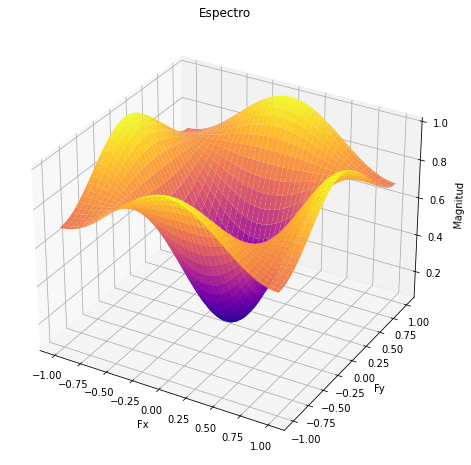

In [4]:
plot_3D(Sh, title='Espectro', x_label='Fx', y_label='Fy', z_label='Magnitud')

A partir de la respuesta en frecuencia observada se puede destacar que el filtro atenúa las bajas frecuencias.

## Definición de impulso unitario

In [5]:
N = 256
big = np.zeros((N, N))
big[int(N/2)][int(N/2)] = 1

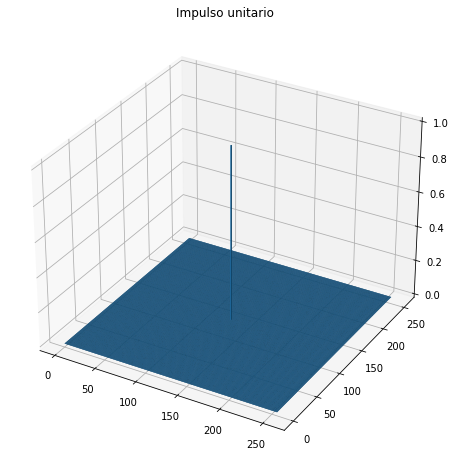

In [6]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_title("Impulso unitario")
x = np.array([[i] * N for i in range(N)]).ravel() # x coordinates of each bar
y = np.array([i for i in range(N)] * N) # y coordinates of each bar
z = np.zeros(N*N) # z coordinates of each bar
dx = np.ones(N*N) # length along x-axis of each bar
dy = np.ones(N*N) # length along y-axis of each bar
dz = big.ravel() # length along z-axis of each bar (height)

ax1.bar3d(x, y, z, dx, dy, dz)
plt.savefig("unitresponse.png")


## Respuesta en frecuencia del impulso unitario

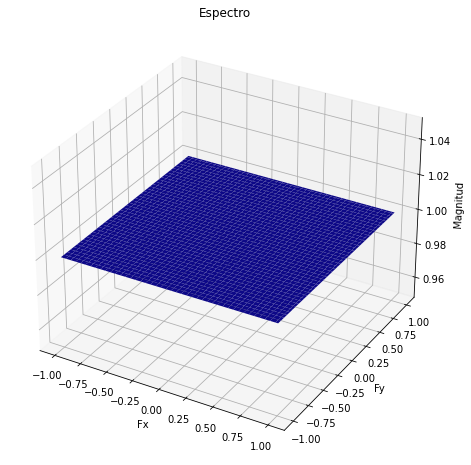

In [7]:
Sbig = fft2(big, s=(256,256))
Sbig = np.abs(Sbig)
Sbig = fftshift(Sbig/np.max(Sbig))
plot_3D(Sbig, title='Espectro', x_label='Fx', y_label='Fy', z_label='Magnitud')

Efectivamente la respuesta en frencuencia del impulso unitario es constante, valiendo 1 en todas las frecuencias.

## Aplicación del filtro al impulso unitario

Al convolucionar en el dominio del tiempo al impulso unitario con el filtro calculado anterioremente, el resultado esperado es nuevamente la respuesta en frecuencia del filtro ya que el impulso unitario presenta un espectro constante en 1.

In [8]:
h1 = sig.convolve2d(big, h)

S = fft2(h1, s=(N,N))
SM = np.abs(S)

shifted = fftshift(SM/np.max(SM))

### Espectro resultante

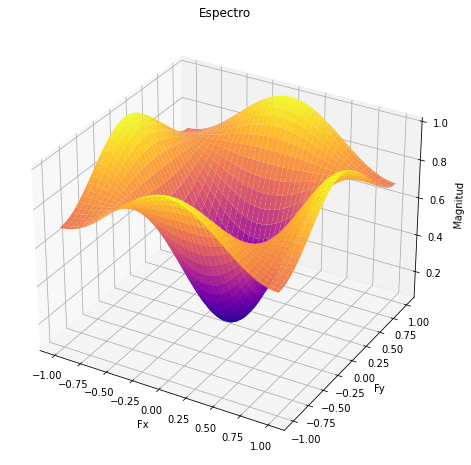

In [9]:
plot_3D(shifted, title='Espectro', x_label='Fx', y_label='Fy', z_label='Magnitud')

Efectivamente se obtuvo la respuesta en frecuencia del filtro definido.

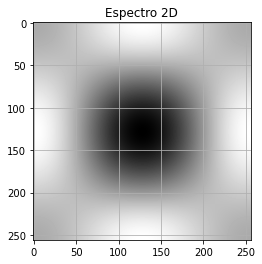

In [10]:
plt.imshow(shifted, cmap='gray')
plt.title('Espectro 2D')
plt.grid()
plt.show()

## En escala logarítmica

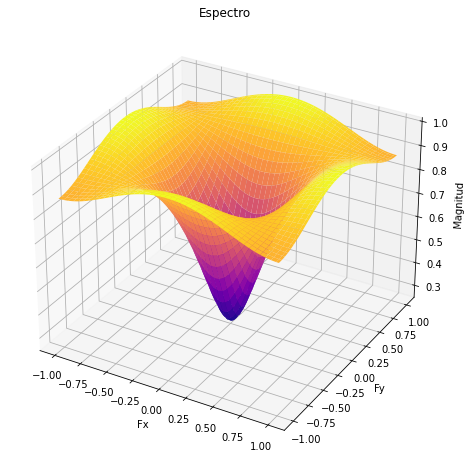

In [11]:

IMd = np.log(1+np.abs(SM))
shiftedImd = fftshift(IMd/np.max(IMd))

plot_3D(shiftedImd, title='Espectro', x_label='Fx', y_label='Fy', z_label='Magnitud')


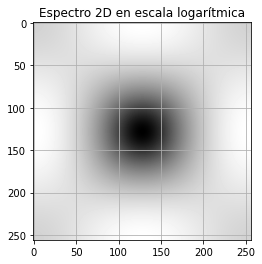

In [12]:
plt.imshow(shiftedImd, cmap='gray')
plt.title('Espectro 2D en escala logarítmica')
plt.grid()
plt.show()